In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-502-2025`


In [3]:
Pkg.add(["NonlinearSolve","Random","Plots","ForwardDiff","LsqFit","Statistics"])

   Resolving package versions...
  No Changes to `~/Documents/programming/BME-502-2025/Project.toml`
  No Changes to `~/Documents/programming/BME-502-2025/Manifest.toml`


In [7]:
using Plots, Random, ForwardDiff, NonlinearSolve, LsqFit, Statistics 

In [4]:
x = collect(0:0.1:1)

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [5]:
y = 2 .* exp.(-2x)

11-element Vector{Float64}:
 2.0
 1.6374615061559636
 1.3406400920712787
 1.097623272188053
 0.8986579282344431
 0.7357588823428847
 0.6023884238244043
 0.493193927883213
 0.40379303598931077
 0.33059777644317306
 0.2706705664732254

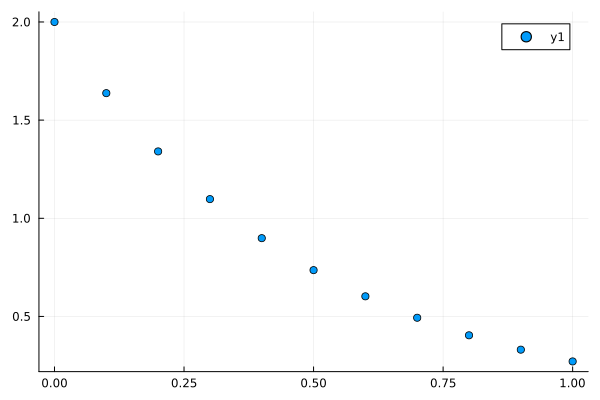

In [8]:
scatter(x,y)

In [9]:
y_exp = y + 0.1*randn(length(y))

11-element Vector{Float64}:
 1.8448514706495116
 1.722571187389535
 1.3338483774241623
 1.23654911113426
 0.8913582665334253
 0.5470206929835474
 0.7108743184777063
 0.4367539224654097
 0.4859022832091415
 0.3719384360492449
 0.3593598072248347

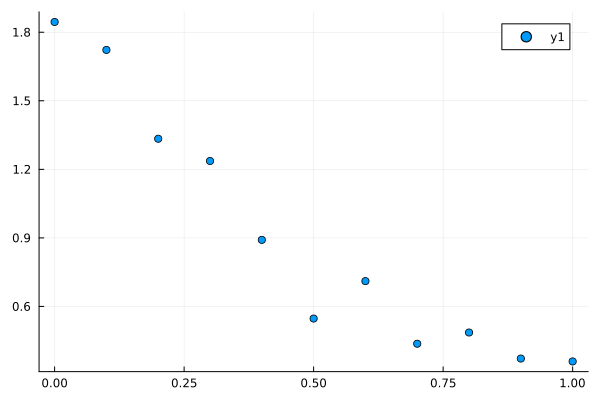

In [10]:
scatter(x,y_exp)

In [14]:
model(x,p) = p[1] .* exp.(-p[2] .* x)

model (generic function with 1 method)

In [15]:
fit = curve_fit(model, x, y_exp, [1.5,1.5])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([1.9356481745671594, 1.8585352043523395], [0.09079670391764783, -0.11521819174726922, 0.000889870231765677, -0.12818884765414307, 0.029018800520092092, 0.2172560259401919, -0.07622258279417116, 0.09025784648304919, -0.048274228334211466, -0.008534190265988006, -0.05759065787027584], [0.9999999999946391 0.0; 0.8303952219947992 -0.16073529956673918; … ; 0.1877429227893408 -0.327063821210353; 0.1559008260497866 -0.3017691493604805], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [30]:
fit.param

2-element Vector{Float64}:
 1.9356481745671594
 1.8585352043523395

In [18]:
cov = estimate_covar(fit)

2×2 Matrix{Float64}:
 0.00673887  0.00770161
 0.00770161  0.0195645

In [19]:
sqrt(estimate_covar(fit))

2×2 Matrix{Float64}:
 0.0732813  0.0369962
 0.0369962  0.134892

In [21]:
p = hcat(x,y_exp)

11×2 Matrix{Float64}:
 0.0  1.84485
 0.1  1.72257
 0.2  1.33385
 0.3  1.23655
 0.4  0.891358
 0.5  0.547021
 0.6  0.710874
 0.7  0.436754
 0.8  0.485902
 0.9  0.371938
 1.0  0.35936

In [22]:
function res(u, p)
    return u[1] .* exp.( -u[2] .* p[:,1]) .- p[:,2]
end

res (generic function with 1 method)

In [23]:
res([1.5,1.5],p)

11-element Vector{Float64}:
 -0.3448514706495116
 -0.43150922275194836
 -0.22262104640158542
 -0.28010688370159986
 -0.06814081239238579
  0.1615291361279746
 -0.1010198288668076
  0.0881527012013234
 -0.034110965340838406
  0.016921954919592364
 -0.02466456700218994

In [27]:
prob = NonlinearLeastSquaresProblem(res, [1.5,2.0], p)

NonlinearLeastSquaresProblem with uType Vector{Float64}. In-place: false
u0: 2-element Vector{Float64}:
 1.5
 2.0

In [28]:
sol = solve(prob, GaussNewton(); maxiters =1000, show_trace = Val(true))


Algorithm: GaussNewton(
    descent = NewtonDescent(),
    autodiff = AutoForwardDiff(),
    vjp_autodiff = AutoFiniteDiff(
        fdtype = Val{:forward}(),
        fdjtype = Val{:forward}(),
        fdhtype = Val{:hcentral}()
    ),
    jvp_autodiff = AutoForwardDiff(),
    concrete_jac = Val{false}()
)

----    	-------------       	-----------         
Iter    	f(u) 2-norm         	Step 2-norm         
----    	-------------       	-----------         
0       	9.13396159e-01      	0.00000000e+00      
1       	3.29400640e-01      	4.75278632e-01      
2       	3.25071351e-01      	5.10519451e-02      
3       	3.25070755e-01      	6.21824661e-04      
4       	3.25070755e-01      	3.95751306e-06      
5       	3.25070755e-01      	2.41557012e-08      
6       	3.25070755e-01      	1.47865665e-10      
7       	3.25070755e-01      	9.05344236e-13      
8       	3.25070755e-01      	5.70404967e-15      
9       	3.25070755e-01      	1.41300934e-16      
10      	3.25070755e-01     

retcode: Stalled
u: 2-element Vector{Float64}:
 1.9356481744850689
 1.8585352041447603